<a href="https://colab.research.google.com/github/Celinekimm/DeepLearning_Mnist/blob/main/DeepLearning_Mnist(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# numpy seed
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

### Deep Learning Frame ###
Now it's time to run data load. A total of 60,000 images for learning datasets and 10,000 for test datasets are called up and divided into X with attribute values and Y with class values.

In [3]:
# MNIST dataset load
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

Now let's set the data frame to run deep learning. There are a total of 784 attributes and 10 classes. Therefore, it is possible to create a deep learning frame as below.
The model has 784 of input_dim, 512 of hidden layers, and 10 outputs.
ReLU is used in the hidden layer and Softmax in the output layer as an activation function.
And for the deep learning process, we use categorical_crossentropy as an loss function and adam as an optimization function.

In [5]:
# Model frame
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Model compile 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Before running the model, save the performance of the model first and set the earlystopping to stop learning automatically in the optimization stage of the model. If there is no improvement in the performance of the model more than 10 times, the learning is automatically stopped.

In [6]:
# Optimising
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

Set all 200 samples to run 30 times and then measure the performance of the final model with a testset and print it to output.

In [7]:
# Run model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# Test Accuracy check
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 1: val_loss improved from inf to 0.14919, saving model to ./model/01-0.1492.hdf5

Epoch 2: val_loss improved from 0.14919 to 0.10328, saving model to ./model/02-0.1033.hdf5

Epoch 3: val_loss improved from 0.10328 to 0.09054, saving model to ./model/03-0.0905.hdf5

Epoch 4: val_loss improved from 0.09054 to 0.07612, saving model to ./model/04-0.0761.hdf5

Epoch 5: val_loss improved from 0.07612 to 0.07565, saving model to ./model/05-0.0757.hdf5

Epoch 6: val_loss improved from 0.07565 to 0.06891, saving model to ./model/06-0.0689.hdf5

Epoch 7: val_loss improved from 0.06891 to 0.06604, saving model to ./model/07-0.0660.hdf5

Epoch 8: val_loss improved from 0.06604 to 0.06366, saving model to ./model/08-0.0637.hdf5

Epoch 9: val_loss improved from 0.06366 to 0.06364, saving model to ./model/09-0.0636.hdf5

Epoch 10: val_loss did not improve from 0.06364

Epoch 11: val_loss improved from 0.06364 to 0.06304, saving model to ./model/11-0.0630.hdf5

Epoch 12: val_loss did not improv

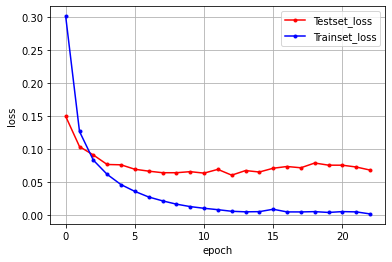

In [8]:
# Test loss check
y_vloss = history.history['val_loss']

# Train loss check
y_loss = history.history['loss']

# Visualisation
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# Grid & Label
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()